## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.
/Users/chibaryowei/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/chibaryowei/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/chibaryowei/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/chibaryowei/anaconda3/lib/pytho

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 0.01
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.01, 0.25, 0.50, 0.75 ,0.95]

In [10]:
results = {}
"""
使用迴圈，建立不同 MOMENTUM 的模型並訓練
"""
for mom in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with momentum = %.6f" % (mom))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=mom)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-momentum-%s" % str(mom)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    

Experiment with momentum = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [======================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 183us/step - loss: 2.0542 - acc: 0.2689 - val_loss: 1.9395 - val_acc: 0.2939
Epoch 2/50
50000/50000 [==============================] - 9s 177us/step - loss: 1.8606 - acc: 0.3428 - val_loss: 1.8947 - val_acc: 0.3247
Epoch 3/50
50000/50000 [==============================] - 9s 170us/step - loss: 1.7842 - acc: 0.3698 - val_loss: 1.7935 - val_acc: 0.3589
Epoch 4/50
50000/50000 [==============================] - 8s 170us/step - loss: 1.7401 - acc: 0.3860 - val_loss: 1.7407 - val_acc: 0.3908
Epoch 5/50
50000/50000 [==============================] - 9s 172us/step - loss: 1.7018 - acc: 0.4006 - val_loss: 1.6827 - val_acc: 0.4057
Epoch 6/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.6688 - acc: 0.4133 - val_loss: 1.6631 - val_acc: 0.4108
Epoch 7/50
50000/50000 [==============================] - 9s 170us/step - loss: 1.6429 - acc: 0.4212 - val_loss: 1.7171 - 

Epoch 2/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.8166 - acc: 0.3554 - val_loss: 1.8329 - val_acc: 0.3510
Epoch 3/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.7487 - acc: 0.3824 - val_loss: 1.7404 - val_acc: 0.3821
Epoch 4/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.6974 - acc: 0.4036 - val_loss: 1.7755 - val_acc: 0.3818
Epoch 5/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.6535 - acc: 0.4168 - val_loss: 1.7484 - val_acc: 0.3823
Epoch 6/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.6237 - acc: 0.4296 - val_loss: 1.6610 - val_acc: 0.4100
Epoch 7/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.5930 - acc: 0.4386 - val_loss: 1.6121 - val_acc: 0.4262
Epoch 8/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.5656 - acc: 0.4478 - val_loss: 1.6208 - val_acc: 0.4162
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 7s 146us/step - loss: 1.6624 - acc: 0.4108 - val_loss: 1.9510 - val_acc: 0.3116
Epoch 4/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.6041 - acc: 0.4338 - val_loss: 1.6350 - val_acc: 0.4242
Epoch 5/50
50000/50000 [==============================] - 7s 150us/step - loss: 1.5595 - acc: 0.4484 - val_loss: 1.7235 - val_acc: 0.3811
Epoch 6/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.5198 - acc: 0.4636 - val_loss: 1.5264 - val_acc: 0.4563
Epoch 7/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.4875 - acc: 0.4737 - val_loss: 1.5148 - val_acc: 0.4592
Epoch 8/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.4510 - acc: 0.4853 - val_loss: 1.5475 - val_acc: 0.4496
Epoch 9/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.4277 - acc: 0.4963 - val_loss: 1.5323 - val_acc: 0.4419
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 7s 134us/step - loss: 1.4463 - acc: 0.4839 - val_loss: 1.4965 - val_acc: 0.4660
Epoch 5/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.4041 - acc: 0.4995 - val_loss: 1.4646 - val_acc: 0.4901
Epoch 6/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.3632 - acc: 0.5165 - val_loss: 1.4794 - val_acc: 0.4802
Epoch 7/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.3261 - acc: 0.5285 - val_loss: 1.4465 - val_acc: 0.4886
Epoch 8/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.2860 - acc: 0.5459 - val_loss: 1.4404 - val_acc: 0.4973
Epoch 9/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.2622 - acc: 0.5495 - val_loss: 1.4225 - val_acc: 0.4937
Epoch 10/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.2260 - acc: 0.5642 - val_loss: 1.3825 - val_acc: 0.5076
Epoch 11/50
50000/50000 [===================

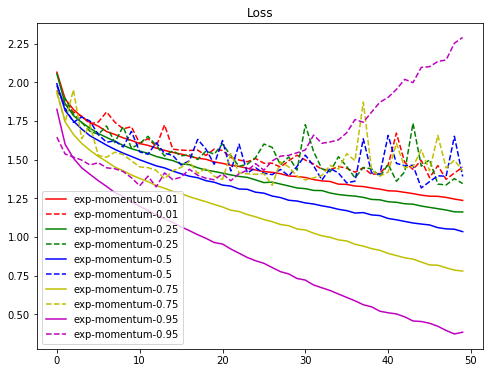

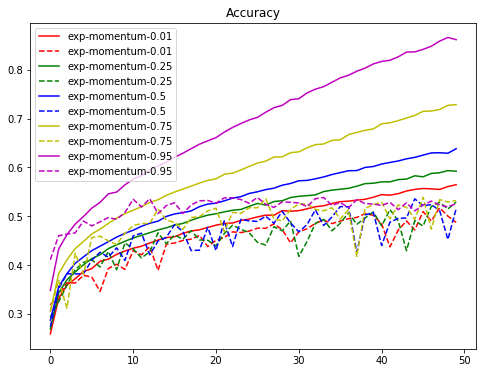

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()